Basic analyses of behavior in the FHT task. 

In [3]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import entropy
import math

# 1. Load and prep data

In [4]:
## Define global variables ##
et_data_dir = os.getcwd() + '/ProcessedData/'# this expects ProcessedData to be in the analysis repo
image_dir = os.getcwd().strip('ldm-analysis') + 'FinalStimuli/ByNumber/'
raw_data_dir = os.getcwd().strip('ldm-analysis') + 'RawData/' # this expects RawData to be one directory up from the analysis repo

## Define screen metadata.
xdim, ydim, n_screens = 1280, 1024, 1 
aoisidelength = 162
n_aois = 9

# Define list with all subject ids; remove 33, 66, and 58 for ec and preproc troubles
good_subjects =  [23, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 53, 54, 
                 55, 57, 60, 61, 62, 63, 67, 68, 69, 70, 71];

In [6]:
behav_data = pd.read_csv(os.getcwd() + '/ProcessedData/CleanedProcessedBehavioralData.csv')
behav_data

,Subj,Trial,Game,Stim11,Stim12,Stim13,Stim21,Stim22,Stim23,Stim31,...,LearnedGame,RT,WithinGameTrial,Adult,Age,IQ,PoL,AgeGroup,MeanLearned,Learned
0,23,1,1,1,6,8,2,5,7,3,...,False,1.12700,1,False,15.105033,99.0,18.0,Adolescent,0.650000,True
1,23,2,1,2,5,7,1,4,8,3,...,False,1.08580,2,False,15.105033,99.0,18.0,Adolescent,0.650000,True
2,23,3,1,3,4,7,2,5,9,1,...,False,1.24420,3,False,15.105033,99.0,18.0,Adolescent,0.650000,True
3,23,4,1,1,4,7,2,5,8,3,...,False,0.47509,4,False,15.105033,99.0,18.0,Adolescent,0.650000,True
4,23,5,1,1,6,8,2,4,7,3,...,False,0.88090,5,False,15.105033,99.0,18.0,Adolescent,0.650000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937,71,396,20,1,5,7,3,4,9,2,...,True,0.61252,16,True,22.508334,73.0,6.0,Adult,0.551637,True
13938,71,397,20,1,5,8,2,4,9,3,...,True,0.89898,17,True,22.508334,73.0,6.0,Adult,0.551637,True
13939,71,398,20,1,6,7,2,4,9,3,...,True,0.59331,18,True,22.508334,73.0,6.0,Adult,0.551637,True
13940,71,399,20,1,6,7,3,5,8,2,...,True,0.52019,19,True,22.508334,73.0,6.0,Adult,0.551637,True


In [7]:
# post_relative_looking_time_df = pd.read_csv('ProcessedData/PostChoice_RelativeLookingTimes.csv')
post_relative_looking_time_df = pd.read_csv('ProcessedData/Outcome_RelativeLookingTimes.csv')

In [8]:
good_behav_data = behav_data[behav_data['Subj'] != 33]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 66]
good_behav_data = good_behav_data[good_behav_data['Subj'] != 58]
good_behav_data = good_behav_data.reset_index(drop=True)
new_df = pd.merge(good_behav_data, post_relative_looking_time_df,  how='left', on=['Subj','Trial'])
new_df[['Chosen1', 'Chosen2', 'Chosen3']]

,Chosen1,Chosen2,Chosen3
0,2.0,5.0,7.0
1,2.0,5.0,7.0
2,3.0,4.0,7.0
3,2.0,5.0,8.0
4,2.0,4.0,7.0
...,...,...,...
13937,2.0,6.0,8.0
13938,2.0,4.0,9.0
13939,2.0,4.0,9.0
13940,2.0,4.0,9.0


# Post-Choice/Outcome Fixations

In [18]:
def calculateEntropy(featureList, base):
    entropy_list = []
    for probFeat in featureList:
        if probFeat != 0:
            entropy_list.append(probFeat*math.log(probFeat, base))
        else:
            entropy_list.append(0)
    return -np.nansum(entropy_list)

In [19]:
entropy_col = []
for index, row in new_df.iterrows():
    feature_a = 'Feature' + str(int(row.Chosen1))
    feature_b = 'Feature' + str(int(row.Chosen2))
    feature_c = 'Feature' + str(int(row.Chosen3))
    if row.TotalLookingTime != 0:
        curr_entropy = calculateEntropy([row[[feature_a]].item(), row[[feature_b]].item(), row[[feature_c]].item()], base=3)
        entropy_col.append(curr_entropy)
    else:
        entropy_col.append(0)
new_df['Entropy'] = entropy_col

In [20]:
new_df.to_csv(os.getcwd() + '/ProcessedData/Feedback_Processed_CombinedBehavioralEyetrackingData.csv', index=False)

In [21]:
feedback_df = pd.merge(post_relative_looking_time_df, new_df[['Entropy', 'Subj', 'Trial']], how='left', on=['Subj','Trial']).fillna(0)
feedback_df

,Trial,Block,Subj,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,TotalLookingTime,FeatureEntropy,Animals,Landscapes,Objects,DimensionEntropy,Entropy
0,1,1,23,0.000000,0.093506,0.000000,0.0,0.236364,0.000000,0.649351,0.000000,0.000000,0.020779,1.540,0.767231,0.093506,0.236364,0.649351,0.767231,0.767231
1,1,1,26,0.000000,0.000000,0.149847,0.0,0.000000,0.174312,0.360856,0.000000,0.000000,0.314985,1.308,0.870871,0.149847,0.174312,0.360856,0.870871,0.870871
2,1,1,27,0.000000,0.000000,0.376050,0.0,0.002101,0.000000,0.000000,0.000000,0.542017,0.079832,1.904,0.648732,0.376050,0.002101,0.542017,0.648732,0.648732
3,1,1,28,0.149626,0.000000,0.000000,0.0,0.122195,0.000000,0.000000,0.000000,0.391521,0.336658,1.604,0.826713,0.149626,0.122195,0.391521,0.826713,0.826713
4,1,1,29,0.000000,0.000000,0.081633,0.0,0.155102,0.000000,0.000000,0.000000,0.661224,0.102041,0.980,0.698259,0.081633,0.155102,0.661224,0.698259,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,400,10,67,0.227273,0.025000,0.561364,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.186364,1.760,0.685478,0.813636,0.000000,0.000000,0.152743,0.295030
13996,400,10,68,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.240326,0.366599,0.000000,0.393075,0.982,0.646747,0.000000,0.000000,0.606925,0.275865,0.311891
13997,400,10,69,0.000000,0.000000,0.000000,0.0,0.000000,0.190367,0.000000,0.410550,0.387615,0.011468,1.744,0.954509,0.000000,0.190367,0.798165,0.451223,0.621821
13998,400,10,70,0.621053,0.000000,0.117895,0.0,0.172632,0.000000,0.000000,0.000000,0.000000,0.088421,1.900,0.774732,0.738947,0.172632,0.000000,0.479511,0.229430


In [22]:
unlearned_trials = new_df[new_df['LearnedGame'] == False]
adole_unlearned_trials = unlearned_trials[unlearned_trials['Adult'] == False]
adult_unlearned_trials = unlearned_trials[unlearned_trials['Adult']]

In [23]:
learning_trials = behav_data.loc[behav_data['LearnedGame']]
learning_trials['AlignedTrial'] = learning_trials['WithinGameTrial'] - learning_trials['PoL']
learning_trials

/var/folders/wg/m30l6kjs09l1pxs4fshqx1xxjyhc2c/T/ipykernel_6171/1063416298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  learning_trials['AlignedTrial'] = learning_trials['WithinGameTrial'] - learning_trials['PoL']


,Subj,Trial,Game,Stim11,Stim12,Stim13,Stim21,Stim22,Stim23,Stim31,...,CenterFeat,Correct,LearnedGame,RT,WithinGameTrial,PoL,Adult,Age,AgeGroup,AlignedTrial
20,23,21,2,2,4,8,3,6,9,1,...,0.0,0.0,True,1.34940,1,7.0,False,15.105033,Adolescent,-6.0
21,23,22,2,2,6,9,1,4,8,3,...,0.0,1.0,True,0.55658,2,7.0,False,15.105033,Adolescent,-5.0
22,23,23,2,1,6,9,2,5,7,3,...,0.0,1.0,True,1.29170,3,7.0,False,15.105033,Adolescent,-4.0
23,23,24,2,2,5,8,1,6,9,3,...,0.0,1.0,True,1.21820,4,7.0,False,15.105033,Adolescent,-3.0
24,23,25,2,3,5,9,1,6,7,2,...,0.0,1.0,True,1.75240,5,7.0,False,15.105033,Adolescent,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15195,71,396,20,1,5,7,3,4,9,2,...,0.0,1.0,True,0.61252,16,6.0,True,22.508334,Adult,10.0
15196,71,397,20,1,5,8,2,4,9,3,...,0.0,1.0,True,0.89898,17,6.0,True,22.508334,Adult,11.0
15197,71,398,20,1,6,7,2,4,9,3,...,0.0,1.0,True,0.59331,18,6.0,True,22.508334,Adult,12.0
15198,71,399,20,1,6,7,3,5,8,2,...,0.0,1.0,True,0.52019,19,6.0,True,22.508334,Adult,13.0


In [24]:
learned_df = learning_trials.merge(feedback_df, on=['Subj', 'Trial'], how='left')
adole_combined_df = learned_df[learned_df['Adult'] == False]
adult_combined_df = learned_df[learned_df['Adult']]

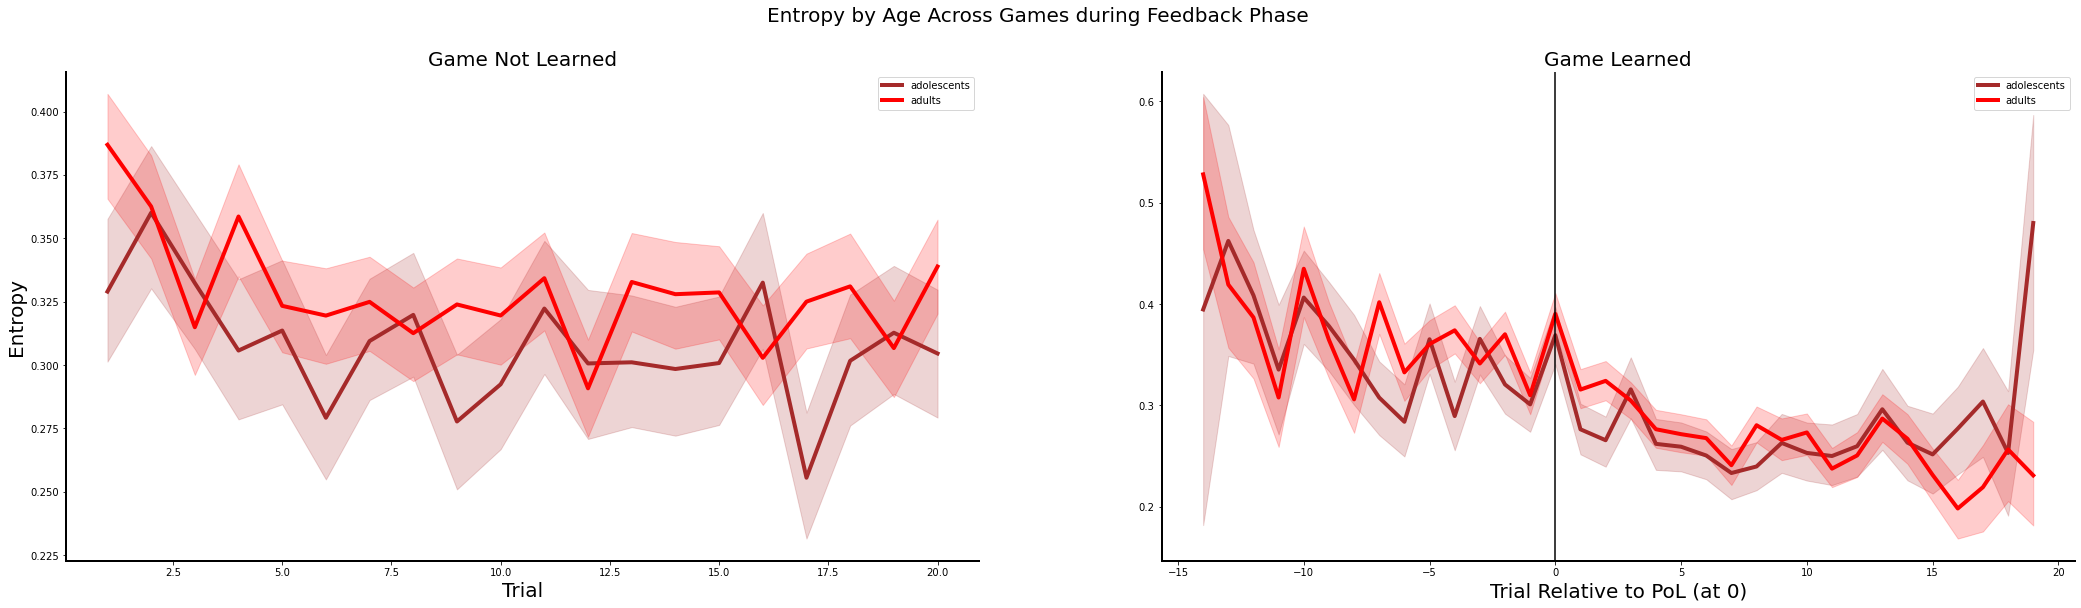

In [25]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['Entropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['Entropy'])

uncombined_df_adult = pd.melt(adult_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['Entropy'])
uncombined_df_adole = pd.melt(adole_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['Entropy'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Entropy by Age Across Games during Feedback Phase',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adult, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Entropy',fontsize = 20);
x2 = ax2.set_xlabel('Trial Relative to PoL (at 0)',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
ax2.axvline(x = 0, color = 'k', label = 'Point of Learning')

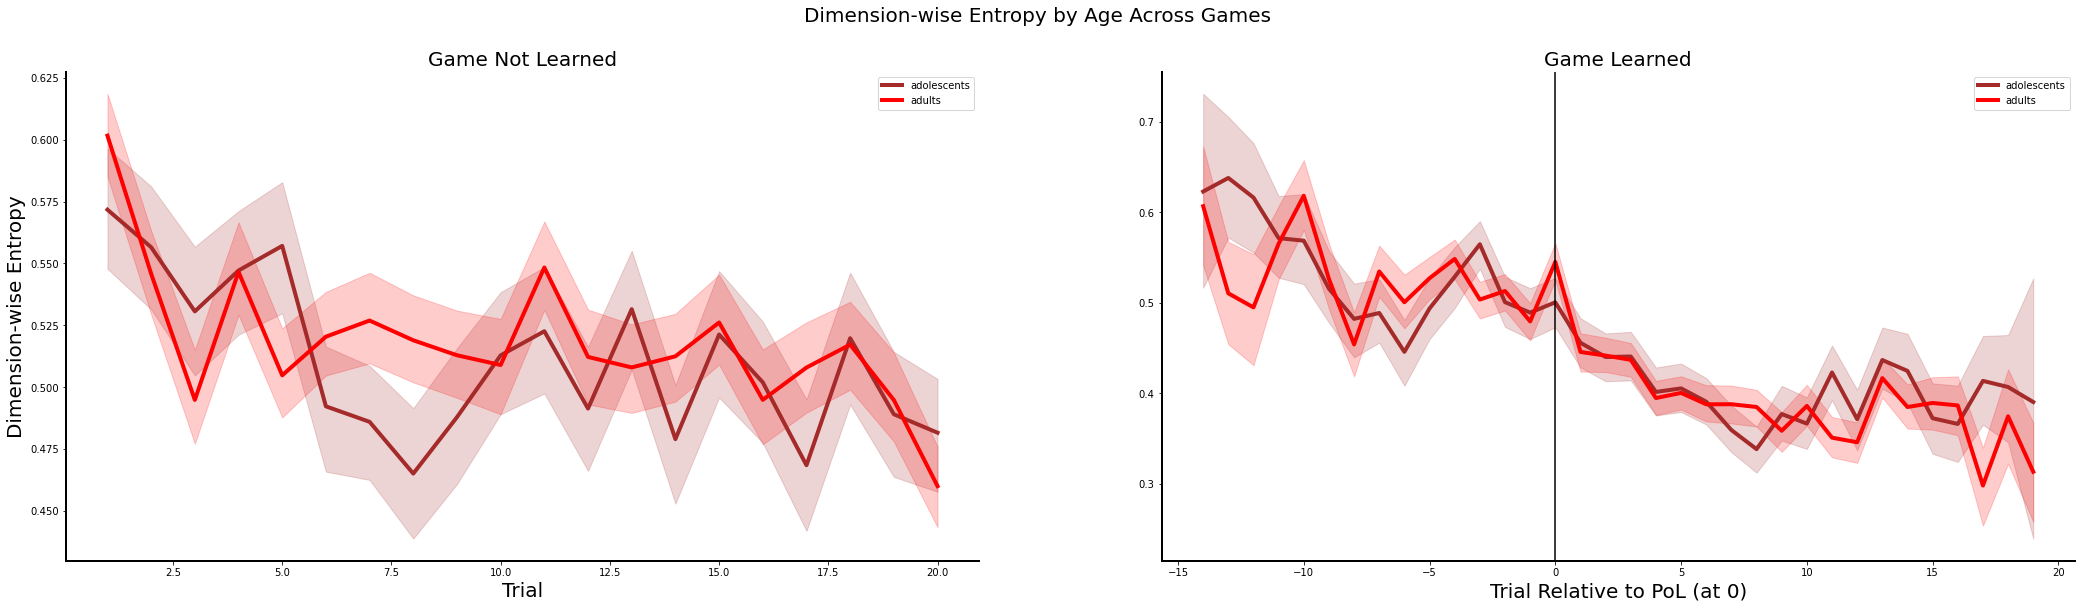

In [26]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['DimensionEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['DimensionEntropy'])

uncombined_df_adult = pd.melt(adult_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])
uncombined_df_adole = pd.melt(adole_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['DimensionEntropy'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Dimension-wise Entropy by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adult, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Dimension-wise Entropy',fontsize = 20);
x2 = ax2.set_xlabel('Trial Relative to PoL (at 0)',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
ax2.axvline(x = 0, color = 'k', label = 'Point of Learning')

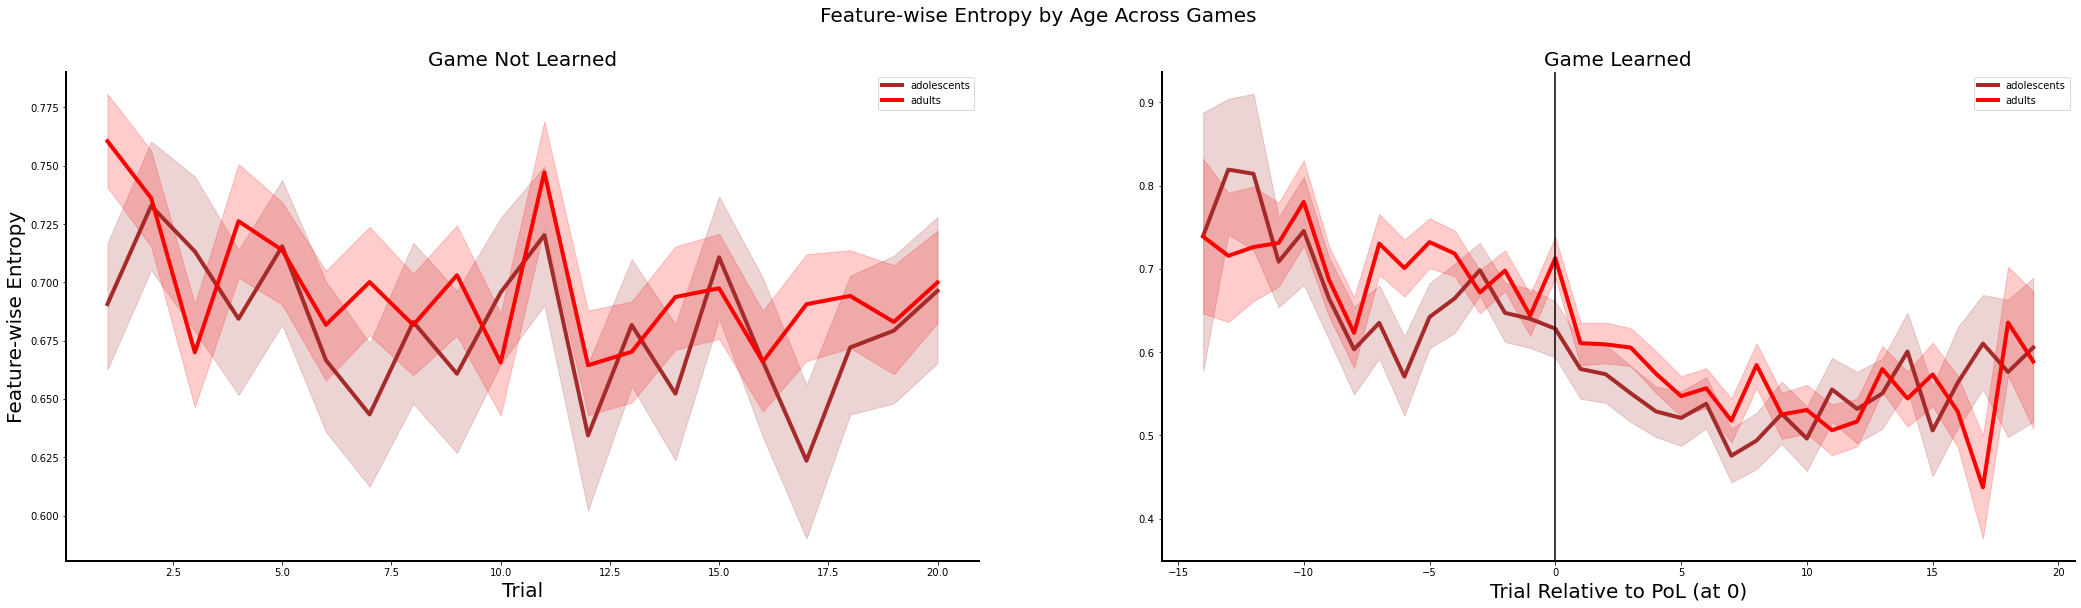

In [27]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['FeatureEntropy'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['FeatureEntropy'])

uncombined_df_adult = pd.melt(adult_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])
uncombined_df_adole = pd.melt(adole_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['FeatureEntropy'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Feature-wise Entropy by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adult, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Feature-wise Entropy',fontsize = 20);
x2 = ax2.set_xlabel('Trial Relative to PoL (at 0)',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
ax2.axvline(x = 0, color = 'k', label = 'Point of Learning')

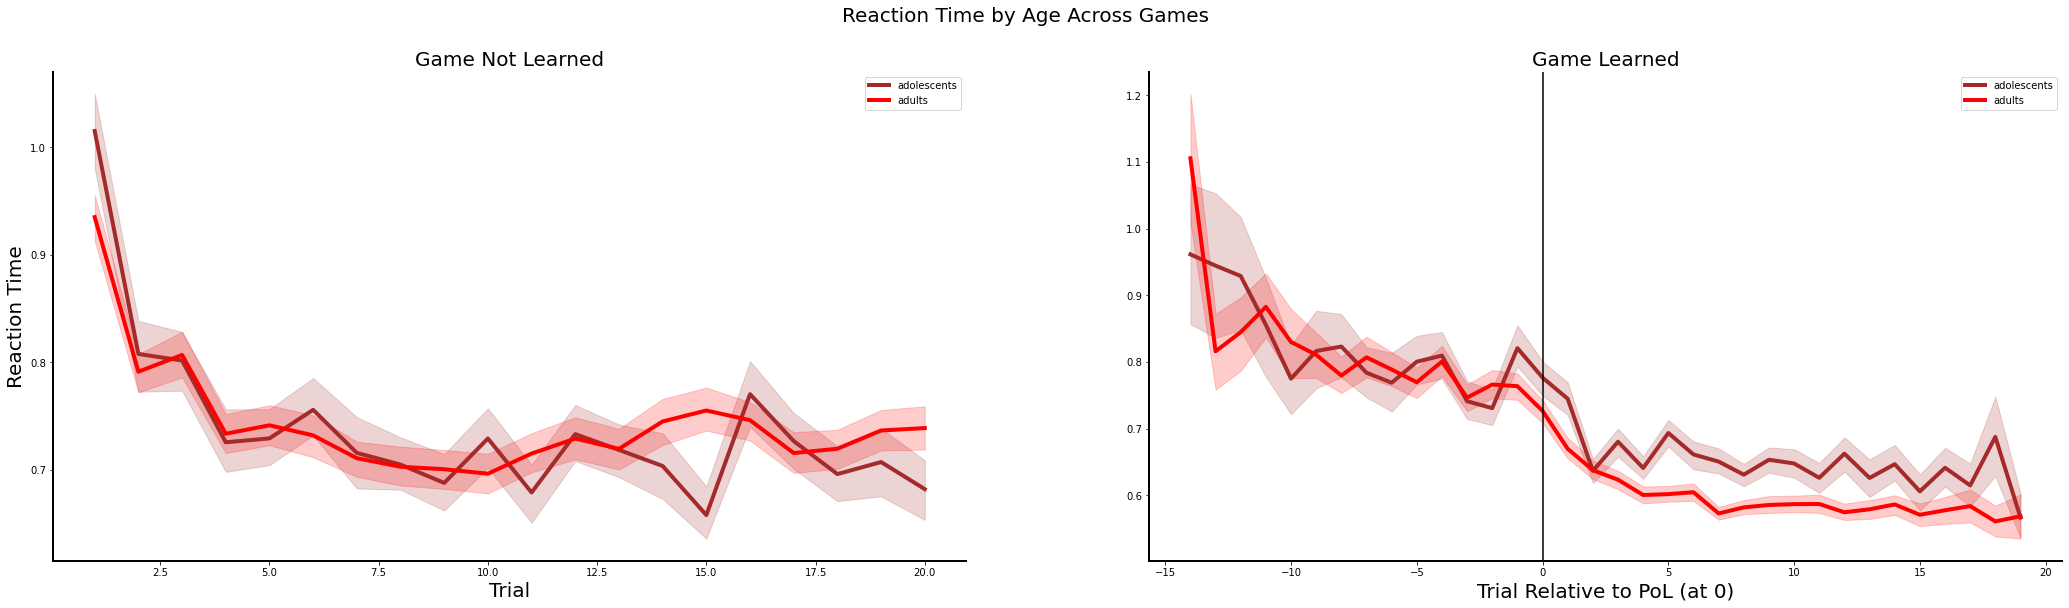

In [28]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['RT'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['RT'])

uncombined_df_adult = pd.melt(adult_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['RT'])
uncombined_df_adole = pd.melt(adole_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['RT'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Reaction Time by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adult, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Reaction Time',fontsize = 20);
x2 = ax2.set_xlabel('Trial Relative to PoL (at 0)',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
ax2.axvline(x = 0, color = 'k', label = 'Point of Learning')

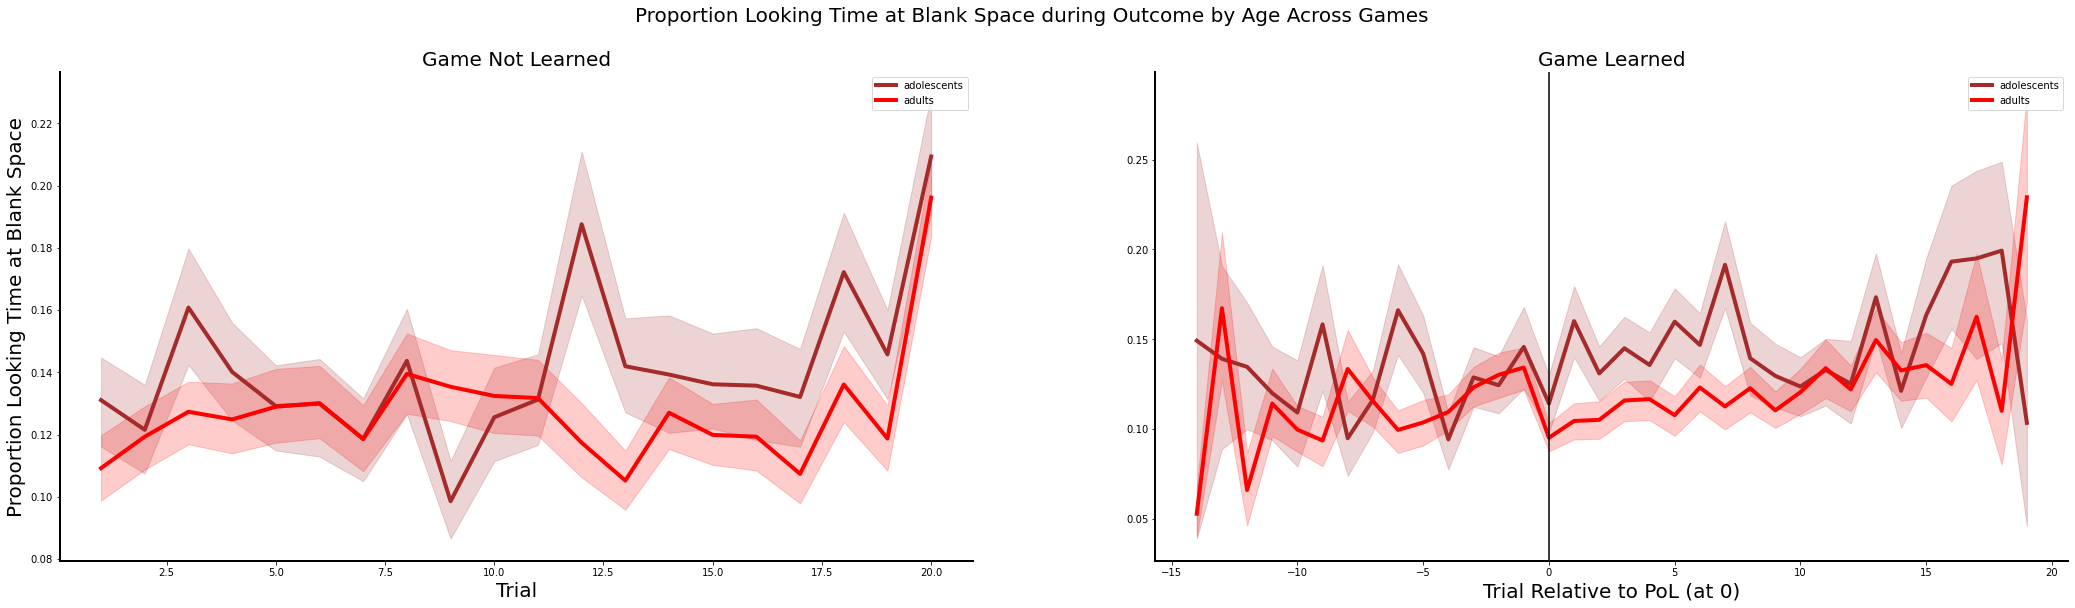

In [29]:
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['Feature10'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['Feature10'])

uncombined_df_adult = pd.melt(adult_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['Feature10'])
uncombined_df_adole = pd.melt(adole_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['Feature10'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Proportion Looking Time at Blank Space during Outcome by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adult, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Proportion Looking Time at Blank Space',fontsize = 20);
x2 = ax2.set_xlabel('Trial Relative to PoL (at 0)',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
ax2.axvline(x = 0, color = 'k', label = 'Point of Learning')

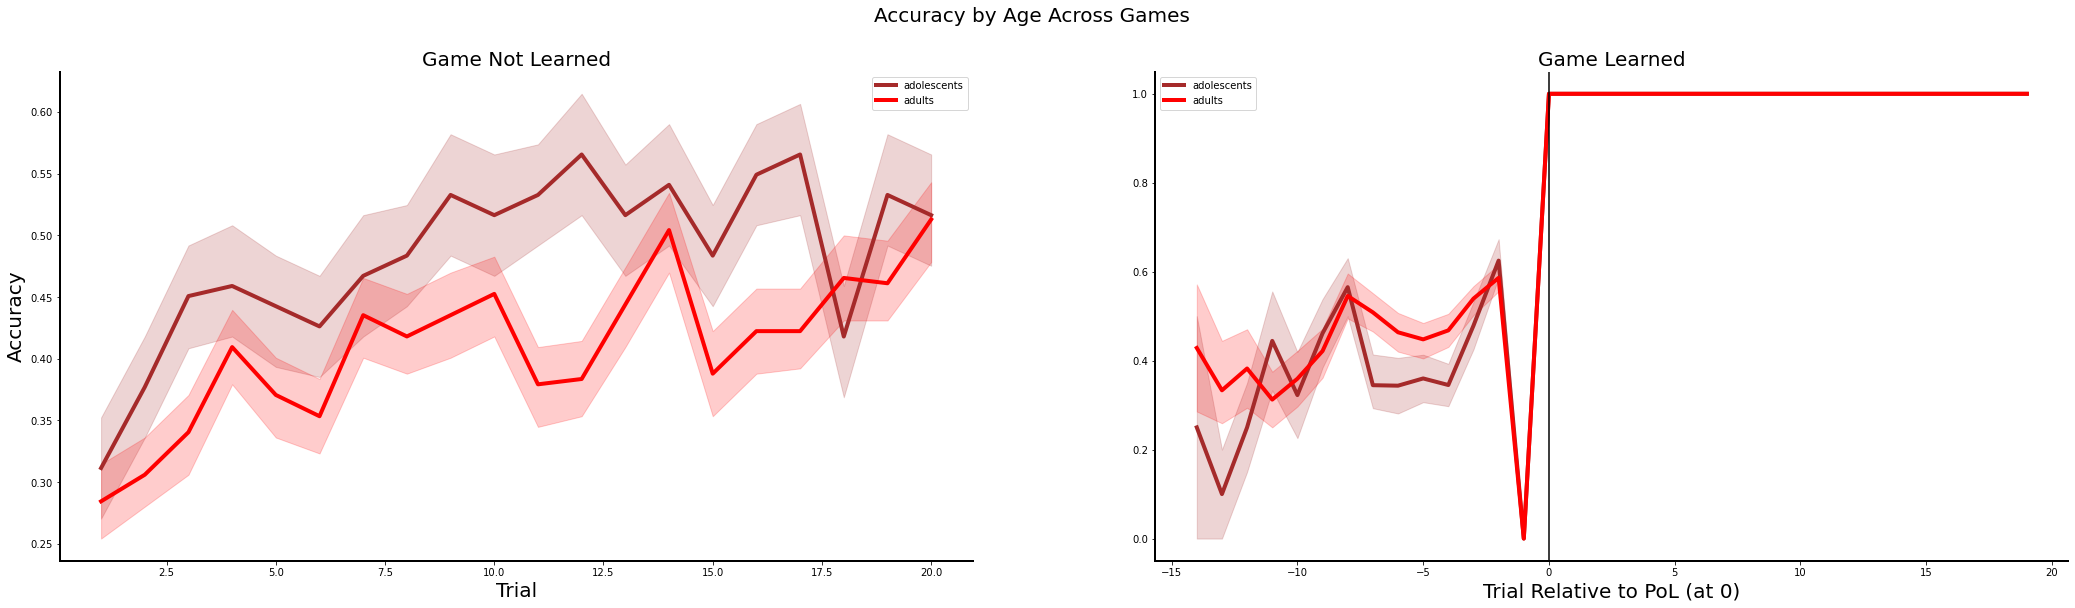

In [30]:
# Learning Curves before PoL
combined_df_adult = pd.melt(adult_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['Correct'])
combined_df_adole = pd.melt(adole_combined_df, col_level=0, id_vars='AlignedTrial', value_vars=['Correct'])

uncombined_df_adult = pd.melt(adult_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])
uncombined_df_adole = pd.melt(adole_unlearned_trials, col_level=0, id_vars='WithinGameTrial', value_vars=['Correct'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(36,9))
fig.suptitle('Accuracy by Age Across Games',fontsize = 20)
ax1.set_title('Game Not Learned',fontsize = 20)
ax2.set_title('Game Learned',fontsize = 20)

l1 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l2 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adole, lw=4, legend='brief', label='adolescents', color='brown')
l3 = sns.lineplot(ax = ax1, x = 'WithinGameTrial', y="value", err_style="band", ci=68, data=uncombined_df_adult, lw=4, legend='brief', label='adults',  color='red')
l4 = sns.lineplot(ax = ax2, x = 'AlignedTrial', y="value", err_style="band", ci=68, data=combined_df_adult, lw=4, legend='brief', label='adults', color='red')
l2.set(ylabel=None)
sns.despine()
# ax1.set_xlim([0,game_length+.05])
# ax1.set_ylim([0,1])
# ax1.set_xticks(np.arange(game_length)+1)
# ax2.set_xlim([0,game_length+.05])
# ax2.set_ylim([0,1])
# ax2.set_xticks(np.arange(game_length)+1)
xl = ax1.set_xlabel('Trial',fontsize = 20);
yl = ax1.set_ylabel('Accuracy',fontsize = 20);
x2 = ax2.set_xlabel('Trial Relative to PoL (at 0)',fontsize = 20);
for axis in ['top','bottom','left','right']:
      ax1.spines[axis].set_linewidth(2)
      ax2.spines[axis].set_linewidth(2)
ax1.tick_params(axis='x',colors='k')
ax2.tick_params(axis='x',colors='k')
ax2.axvline(x = 0, color = 'k', label = 'Point of Learning')


# Dump

In [34]:
pd.DataFrame.from_dict(numCorrectOnSubsequentTrials).sort_values(['Subj','Game'], ascending = (True, True)).reset_index(drop=True)

,Subj,Game,WithinGameTrial,SubsequentCorrect,EightyPercent
0,23.0,1.0,1,15.0,False
1,23.0,1.0,2,14.0,False
2,23.0,1.0,3,13.0,False
3,23.0,1.0,4,13.0,False
4,23.0,1.0,5,12.0,False
...,...,...,...,...,...
15195,71.0,20.0,16,5.0,True
15196,71.0,20.0,17,4.0,True
15197,71.0,20.0,18,3.0,True
15198,71.0,20.0,19,2.0,True


In [19]:
subsequentcorrect_df = pd.DataFrame.from_dict(numCorrectOnSubsequentTrials).sort_values(['Subj','Game'], ascending = (True, True)).reset_index(drop=True) #.rename(columns={"Correct": "SubsequentCorrect"})

Subj                 23.0
Game                  1.0
WithinGameTrial      11.0
SubsequentCorrect     8.0
EightyPercent        11.0
Name: 10, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      16.0
SubsequentCorrect     4.0
EightyPercent        16.0
Name: 15, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      18.0
SubsequentCorrect     3.0
EightyPercent        18.0
Name: 17, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      19.0
SubsequentCorrect     2.0
EightyPercent        19.0
Name: 18, dtype: float64
Subj                 23.0
Game                  1.0
WithinGameTrial      20.0
SubsequentCorrect     1.0
EightyPercent        20.0
Name: 19, dtype: float64
Subj                 23.0
Game                  2.0
WithinGameTrial       1.0
SubsequentCorrect    18.0
EightyPercent         1.0
Name: 20, dtype: float64
Subj                 23.0
Game                  2.0
WithinGameTrial   